In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Array for state name abbreviation

States = np.array([['Alabama', 'AL'], ['Alaska', 'AK'], ['Arizona', 'AZ'], ['Arkansas', 'AR'], ['California', 'CA'], ['Colorado', 'CO'],
    ['Connecticut', 'CT'], ['Delaware', 'DE'], ['District of Columbia', 'DC'], ['Florida', 'FL'], ['Georgia', 'GA'],
    ['Hawaii', 'HI'], ['Idaho', 'ID'], ['Illinois', 'IL'], ['Indiana', 'IN'], ['Iowa', 'IA'], ['Kansas', 'KS'], ['Kentucky', 'KY'],
    ['Louisiana', 'LA'], ['Maine', 'ME'], ['Maryland', 'MD'], ['Massachusetts', 'MA'], ['Michigan', 'MI'], ['Minnesota', 'MN'],
    ['Mississippi', 'MS'], ['Missouri', 'MO'], ['Montana', 'MT'], ['Nebraska', 'NE'], ['Nevada', 'NV'], ['New Hampshire', 'NH'],
    ['New Jersey', 'NJ'], ['New Mexico', 'NM'], ['New York', 'NY'], ['North Carolina', 'NC'], ['North Dakota', 'ND'],
    ['Ohio', 'OH'], ['Oklahoma', 'OK'], ['Oregon', 'OR'], ['Pennsylvania', 'PA'], ['Rhode Island', 'RI'], ['South Carolina', 'SC'],
    ['South Dakota', 'SD'], ['Tennessee', 'TN'], ['Texas', 'TX'], ['Utah', 'UT'], ['Vermont', 'VT'], ['Virginia', 'VA'], 
    ['Washington', 'WA'], ['West Virginia', 'WV'], ['Wisconsin', 'WI'], ['Wyoming', 'WY']])
print(States.shape)
print(States[1,1])

(51, 2)
AK


In [3]:
# calling data 

r1_file = '4.18states.csv'
dfc = pd.read_csv(r1_file)   
r2_file ='abridged_couties.csv'
dfp = pd.read_csv(r2_file)  
r_file = 'time_series_covid19_confirmed_US.csv'
df = pd.read_csv(r_file)     # df time series
print(dfc.shape)
print(dfp.shape)
print(df.shape)

(140, 18)
(3244, 87)
(3255, 99)


In [4]:
# extract 'US' and 'required columns' in '4.18states.csv'  

dfc_us = dfc.loc[dfc['Country_Region']=='US', ['Province_State', 'Confirmed','People_Tested']]
print(dfc_us.shape)
print(len(dfc_us))
print(dfc_us.iloc[1,0])

(59, 3)
59
Alaska


In [5]:
# extract 'StateName' and 'required columns' in 'abridged_couties.csv'

dfp_s = dfp.loc[ (dfp['PopulationEstimate2018']>0), ['StateName', 'PopulationEstimate2018']]
#print(dfp_s.shape)
#print(dfp_s)
### summation by 'StateName' and convert to numpy()
dfp_s_sum = dfp_s.groupby(['StateName']).sum().reset_index().to_numpy()   # sum sorted data. maintain 'StateName' as a key
#print(dfp_s_sum)

In [6]:
# extract 'Province_State' and dates in 'time_series_covid19_confirmed_US.csv' 

df_t = df.iloc[:,np.r_[6, 11:99]]   # column-6('Province_State'), column-11:99(dates)
print(df_t.head)
ystates = df_t.groupby(['Province_State']).sum().reset_index().to_numpy()  # sum sorted data. maintain 'Province_State' as a key
print(ystates.shape)
print(ystates[0:5])


<bound method NDFrame.head of                 Province_State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0               American Samoa        0        0        0        0        0   
1                         Guam        0        0        0        0        0   
2     Northern Mariana Islands        0        0        0        0        0   
3                  Puerto Rico        0        0        0        0        0   
4               Virgin Islands        0        0        0        0        0   
...                        ...      ...      ...      ...      ...      ...   
3250                 Wisconsin        0        0        0        0        0   
3251                   Wyoming        0        0        0        0        0   
3252            Grand Princess        0        0        0        0        0   
3253                  Michigan        0        0        0        0        0   
3254                  Michigan        0        0        0        0        0   

      1/27/20  1/28/2

In [7]:
# getting 'graident(coef_) of Linear regression' for each state

yt = ystates[:, 1:89]   # rows in range(column_date)
print(yt.shape[0], yt.shape[1], yt[0])

Xt = np.array(range(1, yt.shape[1]+1)).reshape(-1, 1)     # 1 ~ 88
print(len(Xt), Xt)
Xt = Xt.reshape(-1, 1)   # reshape to (N, 1)

np.random.seed(551)  

state_grad = np.array([[' ', 0]], dtype=object)  # (1, 2)

for i in range(0, len(yt)) :
    Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt[i], test_size=0.2)
    # Linear Regression    
    Lin_reg = LinearRegression().fit(Xt_train, yt_train)
    #print('--coefficients:', ystates[i, 0], '-', Lin_reg.coef_)   # gradient 
    #print('Model Score : ', Lin_reg.score(Xt_test, yt_test))
    arr = [[ystates[i,0], float(Lin_reg.coef_)]]
    state_grad = np.vstack((state_grad , np.array(arr, object))) 
    
state_grad = np.delete(state_grad, 0, axis=0)  
print(state_grad.shape, state_grad)


58 88 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 7 11 29 39 51 78 106 131 157 196 242 381
 517 587 694 825 899 987 1060 1233 1495 1614 1765 1952 2169 2328 2703 2947
 3217 3563 3734 3953 4075 4345 4571 4712]
88 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]]
(58, 2) [['Alabama' 36.77927939136072]
 ['Alaska' 2.9638666179071045]
 ['American Samoa' -0.0]
 ['Arizona' 36.988735546039976]
 ['Arkansas' 14.764326764598634]
 ['California' 272.49485260191204]
 ['

In [8]:
### merge necessary field data with 'dfc_us', 'dfp_s' and 'state_grad' 
# 'StateName', 'PopulationEstimate2018', ,'People_Tested', 'Confirmed', 'Gradient'

merged = np.array([[' ', 0, 0, 0, 0]], dtype=object)  # (1, 4)
#print(merged.shape)


for i in range(0, len(dfc_us)):
    findstate = np.where(States[:,0] == dfc_us.iloc[i,0])  # check 'Province_State' with full name of States
    #print(findstate[0], len(findstate[0]))
    if  len(findstate[0]) > 0 :
        #print(dfc_us.iloc[i,0], dfc_us.iloc[i,1], dfc_us.iloc[i,2], findstate[0], States[findstate[0],1])
        findstated = np.where(dfp_s_sum[:,0] == States[findstate[0],1])  # check 'StateName' with short name of States
        if  len(findstated[0]) > 0 :
            #print(dfp_s_sum[findstated[0],0], dfp_s_sum[findstated[0],1])
            findstateg = np.where(state_grad[:,0] == States[findstate[0],0])  # # check 'Province_State' with full name          
            #print( States[findstate[0],0], state_grad[findstateg[0],0], state_grad[findstateg[0],1] )
            if len(findstateg[0]) > 0 :

                ### append a row as 'StateName', 'PopulationEstimate2018', ,'People_Tested', 'Confirmed', 'Grdient(coef_)'
                arr = [[' '.join(map(str, dfp_s_sum[findstated[0],0])), int(dfp_s_sum[findstated[0],1]),
                       int(dfc_us.iloc[i,2]), int(dfc_us.iloc[i,1]), float(state_grad[findstateg[0],1])]]
                merged = np.vstack((merged, np.array(arr, object)))


merged = np.delete(merged, 0, axis=0)  
#print(merged.shape)
#print(merged[2,0], merged[2,1],merged[2,2],merged[2,3])
merged = merged[merged[:, 1].argsort()]  # columnIndex : 1 / sort ascendinng order
#print(merged)


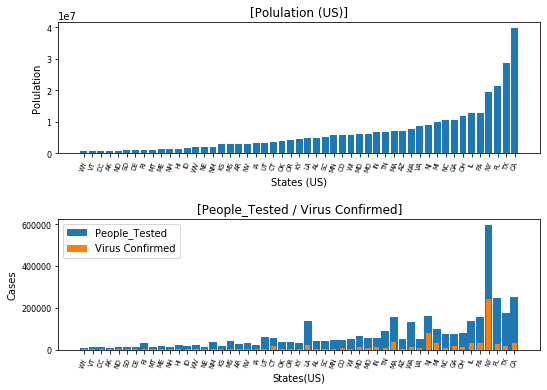

In [9]:
### 1. plot : Population   &  People_Tested vs. Confirmed 

plt.figure(figsize=(8,6)) 
plt.subplot(2,1,1)
plt.title('[Polulation (US)]', fontsize=12)
plt.ylabel('Polulation')
plt.xlabel('States (US)')
plt.xticks(fontsize=6.5, rotation=70)
plt.yticks(fontsize=8)
plt.tight_layout(pad=2.8, h_pad=0.1, w_pad=0.2) 
## merged : 'StateName', 'PopulationEstimate2018', 'People_Tested', 'Confirmed', 'Gradient'
plt.bar(merged[:,0], merged[:,1], width = 0.8)

plt.subplot(2,1,2)
plt.title('[People_Tested / Virus Confirmed]', fontsize=12)
plt.ylabel('Cases')
plt.xlabel('States(US)')
plt.xticks(fontsize=6.5, rotation=70)
plt.yticks(fontsize=8)
plt.tight_layout(pad=2.8, h_pad=0.1, w_pad=0.2) 
## merged : 'StateName', 'PopulationEstimate2018', 'People_Tested', 'Confirmed', 'Gradient'
plt.bar(merged[:,0], merged[:,2], width = 0.9, label='People_Tested')
plt.bar(merged[:,0], merged[:,3], width = 0.6, label='Virus Confirmed')
plt.legend(loc='upper left')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [10]:
### 2. Analyze if there is a relationship between Polulation and spreadinng speed of corona virus
## Try to estimate spreadinng speed of each state using 'graident(coef_) of Linear regression' 

np.random.seed(2)  
Xm = merged[:, 1].reshape(-1, 1)  # get population of state
ym = merged[:, 4]                # get gradient of state
#print(Xm, ym)

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2)
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
XXm = poly_feature.fit_transform(Xm_train)    #  makes to  x^2    
#print(XXm)

NLin_XX_regm = LinearRegression().fit(XXm, ym_train)  # Non Linear Regression
Lin_ym = NLin_XX_regm.predict(XXm)
print('Coefficients:', NLin_XX_regm.coef_ )   # gradient 
XXt = poly_feature.fit_transform(Xm_test)    #  makes to  x^2  
print('Model Score :', NLin_XX_regm.score(XXt, ym_test))

Coefficients: [ 2.30286895e-05 -4.06466858e-13]
Model Score : 0.1262414757288023


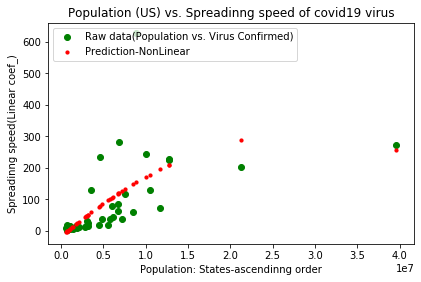

51 [5.77737000e+05 2.77852782e+00] [3.95570450e+07 2.13681156e+03] (0, 1)
[[0.00000000e+00 0.00000000e+00]
 [1.24584049e-03 2.53046898e-03]
 [3.19959503e-03 7.95070662e-03]
 [4.09707119e-03 8.68490743e-05]
 [4.67786652e-03 4.97877036e-04]
 [7.44469348e-03 1.70640801e-03]
 [9.99078793e-03 6.15147638e-03]
 [1.23033995e-02 6.67859918e-03]
 [1.24314162e-02 8.54856876e-04]
 [1.95146358e-02 2.37776519e-03]
 [1.99778046e-02 3.22944162e-03]
 [2.16205480e-02 1.19624390e-03]
 [3.01819365e-02 5.51530578e-03]
 [3.15063315e-02 1.69281193e-03]
 [3.46730373e-02 2.36997202e-03]
 [3.89358118e-02 5.14043593e-03]
 [5.98719710e-02 5.16807919e-03]
 [6.17967102e-02 1.23545568e-02]
 [6.24969535e-02 5.61650112e-03]
 [6.30245924e-02 1.37102561e-02]
 [6.61481215e-02 5.90218801e-03]
 [6.62753685e-02 1.00646226e-02]
 [7.68337909e-02 5.94874910e-02]
 [8.63366276e-02 7.66864073e-03]
 [9.26895880e-02 6.45799890e-03]
 [9.98135985e-02 8.09578085e-03]
 [1.04728411e-01 1.08289792e-01]
 [1.10574923e-01 1.59326266e-02]
 [

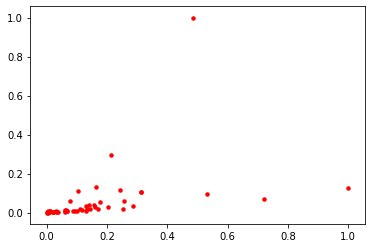

In [11]:
## plot 
plt.title('Population (US) vs. Spreadinng speed of covid19 virus', fontsize=12)
plt.ylabel('Spreadinng speed(Linear coef_)')
plt.xlabel('Population: States-ascendinng order')
plt.tight_layout(pad=1, h_pad=0.2, w_pad=0.2) 
plt.scatter(Xm_train, ym_train, color = 'green', label='Raw data(Population vs. Virus Confirmed)')
plt.scatter(Xm_train, Lin_ym, marker='.', color = 'red', linewidth=1.2, label='Prediction-NonLinear') 
plt.legend(loc='upper left')
plt.show()

### Check Transformation : MinMaxScaler 
mimx = MinMaxScaler()
sarr = merged[:, np.r_[1, 4]]      
scaler = mimx.fit(sarr)        
print(scaler.n_samples_seen_, scaler.data_min_, scaler.data_max_, scaler.feature_range)
mer_minmax = scaler.transform(sarr)  
print(mer_minmax)
plt.scatter(mer_minmax[:, 0], mer_minmax[:, 1], marker='.', color = 'red', linewidth=1.5) 
plt.show()

In [12]:
#read csv file called "time_series_covid19_confirmed_US"
df = pd.read_csv("time_series_covid19_confirmed_US.csv")
df.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53


In [13]:
y = df.iloc[:, 11:99].sum(axis=0)  # sum rows in range(column_date)
X = np.array(range(1, len(y)+1))  # 1 ~ 88
Xr = X.reshape(-1, 1)   # reshape to (N, 1)
print(X.shape)

(88,)


In [14]:
np.random.seed(511)  
X_train, X_test, y_train, y_test = train_test_split(
    Xr, y, test_size=0.25)
print(y_train.shape, y_test.shape)

(66,) (22,)


In [15]:
###Linear Regression   
Lin_reg = LinearRegression().fit(X_train, y_train)
Lin_y = Lin_reg.predict(X_train)
print('[Linear Model]')
print('--intercept:', Lin_reg.intercept_)  
print('--coefficients:', Lin_reg.coef_)
print("Linear Model Score : ", Lin_reg.score(X_test, y_test))

[Linear Model]
--intercept: -155377.5730971177
--coefficients: [6211.04337756]
Linear Model Score :  0.1281058926943508


In [16]:
### Non Linear Regression : x^2 
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
XX = poly_feature.fit_transform(X_train)    #  makes to  x^2    
NLin_XX_reg = LinearRegression().fit(XX, y_train)  # Linear Regression 
Nxxy = NLin_XX_reg.predict(XX)
#print('[Non-Linear Model(x^2)]')
#print('--intercept:', NLin_XX_reg.intercept_)  # check 
#print('--coefficients:', NLin_XX_reg.coef_)
XX_test = poly_feature.fit_transform(X_test)    #  makes to n x^2
print("Non-Linear Model(x^2) Score : ", NLin_XX_reg.score(XX_test, y_test))

Non-Linear Model(x^2) Score :  0.6380271666860843


In [17]:
### Non Linear Regression x^3 
#poly_feature = PolynomialFeatures(degree=2, include_bias=False)
#XX = poly_feature.fit_transform(X_train)    #  makes to  x^2 

XXX = poly_feature.fit_transform(XX)    #  makes to x^3    
NLin_XXX_reg = LinearRegression().fit(XXX, y_train)  # Linear Regression 
Nxxxy = NLin_XXX_reg.predict(XXX)
#print('[Non-Linear Model(x^3)]')
#print('--intercept:', NLin_XXX_reg.intercept_)  # check 
#print('--coefficients:', NLin_XXX_reg.coef_)
XXX_test = poly_feature.fit_transform(XX_test)    #  makes to  x^3
print("Non-Linear Model(x^3) : ", NLin_XXX_reg.score(XXX_test, y_test))

Non-Linear Model(x^3) :  0.9769774198406431


In [18]:
# predict future using Non Linear Regression x^3 ##############
FX = np.array([100])  # predict 'Total number of virus confirmed' 
#after 100 days after 1/22/20 
FX = FX.reshape(-1, 1) 
FXX = poly_feature.fit_transform(FX)    #  makes to  x^2 
FXXX = poly_feature.fit_transform(FXX)    #  makes to  x^3   
print('Predic Future:', int(NLin_XXX_reg.predict(FXXX))) 

Predic Future: 1502791


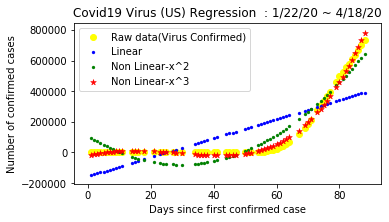

In [19]:
## plot 
plt.title('Covid19 Virus (US) Regression  : 1/22/20 ~ 4/18/20', fontsize=12)
plt.ylabel('Number of confirmed cases')
plt.xlabel('Days since first confirmed case')
plt.tight_layout(pad=4, h_pad=0.2, w_pad=0.2) 
line1 = plt.scatter(X_train, y_train, color = 'yellow', label='Raw data(Virus Confirmed)')
line2 = plt.scatter(X_train, Lin_y, marker='.', color = 'blue', linewidths=0.3, label='Linear') # Linear 
line3 = plt.scatter(X_train, Nxxy, marker='.', color = 'green', linewidths=0.3, label='Non Linear-x^2')  # Non-Linear  x^2
line4 = plt.scatter(X_train, Nxxxy, marker='*',color = 'red', linewidths=0.5, label='Non Linear-x^3')       # Non-Linear  x^3
plt.legend(loc='upper left')
plt.show()